# Californian Housing Market




Dans Sklearn, il y a des datasets qui sont déjà pré-enregistré qu'on peut utiliser à nos fins pour appliquer des algorithmes de Machine Learning. Tentons de regarder le premier avec _Boston Housing Market_

1. Importez les librairies usuelles

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


    2. Utilisez les lignes de codes suivantes afin de récupérer les données sur les prix de l’immobilier en Californie :
    
```
from sklearn import datasets
data = datasets.california_housing.fetch_california_housing()
```

In [0]:
from sklearn import datasets
#data = datasets.california_housing.fetch_california_housing()
data = sklearn.datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)

In [0]:
print(data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [0]:
print(data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


3. Utilisez UNE ligne de code pour obtenir les noms des différentes variables explicatives

In [0]:
data["feature_names"]
#data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

4. On préfèrerait avoir ces données dans un DataFrame. Utilisez la librairies 


Pandas pour trouver un moyen de mettre ces données dans un DataFrame 

Vous pouvez aller plus particulièrement regarder le lien suivant : 

[DataFrame en Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [0]:
dataset = pd.DataFrame(columns=data["feature_names"], data=data.data)
dataset = pd.concat([dataset,pd.DataFrame({"Price":data.target})], axis=1)


dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [0]:
dataset = pd.DataFrame(data=data.data)
dataset.columns = data.feature_names
dataset["Price"] = data.target
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [0]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

5. Visualisez l'impact de chacune des variables sur le prix avec Seaborn 

a. Faites un nuage de points pour exprimer _Price_ en fonction de _MedInc_

In [0]:
dataset.columns[-1]

'Price'

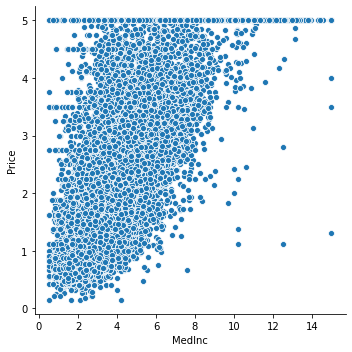

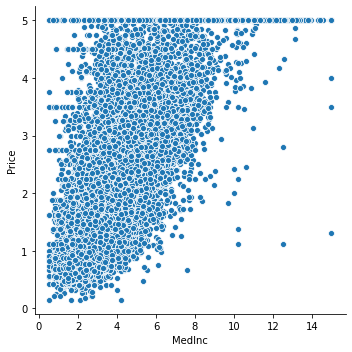

In [0]:
sns.relplot(x=dataset.columns[0], y=dataset.columns[-1], data= dataset)
#sns.relplot(x="MedInc", y= "Price", data=dataset)

b. Regardez maintenant l'influence de l'âge de la maison par rapport au prix

In [0]:
for i in range(0,7,1):
  sns.relplot(x=dataset.columns[i], y=dataset.columns[-1], data= dataset, kind="line")

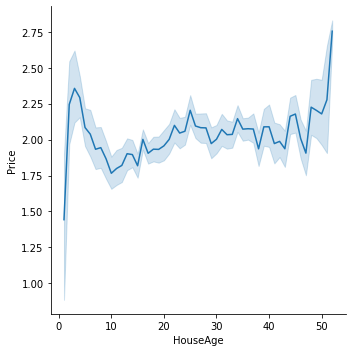

In [0]:
sns.relplot(x=dataset.columns[1], y=dataset.columns[-1], data= dataset, kind="line")

c. Trouvez un moyen de regarder la tendance entre _AveRooms_ & _Price_

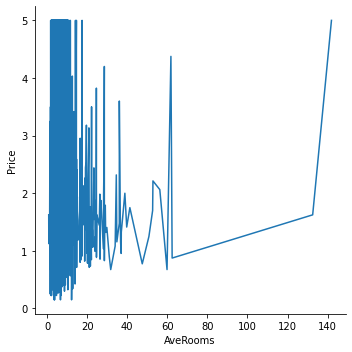

In [0]:
sns.relplot(x=dataset.columns[2], y=dataset.columns[-1], data= dataset, kind="line")

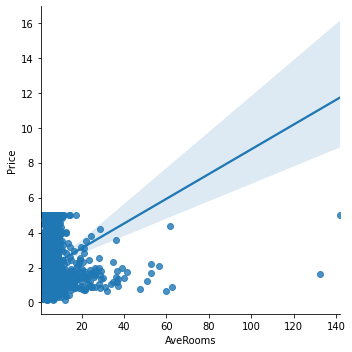

In [0]:
sns.lmplot(x=dataset.columns[2], y=dataset.columns[-1], data= dataset)

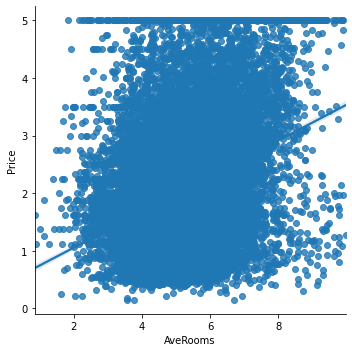

In [0]:
sns.lmplot(x=dataset.columns[2], y=dataset.columns[-1], data= dataset.loc[dataset["AveRooms"]<10])

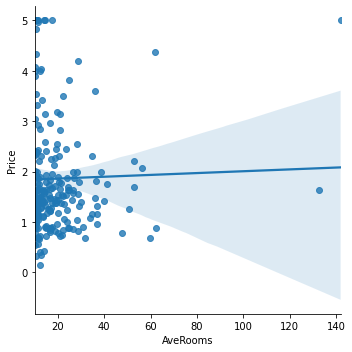

In [0]:
sns.lmplot(x=dataset.columns[2], y=dataset.columns[-1], data= dataset.loc[dataset["AveRooms"]>=10])

d. Faites de même avec _AveBedrms_ & _Price_

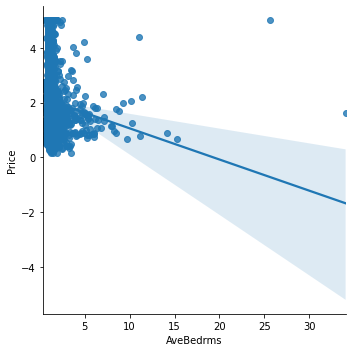

In [0]:
sns.lmplot(x=dataset.columns[3], y=dataset.columns[-1], data= dataset)

e. Faites de même avec la population. Simplement, filtrez le dataset pour qu'il ne contienne uniquement les valeurs pour lesquelles la population est inférieur à 15000

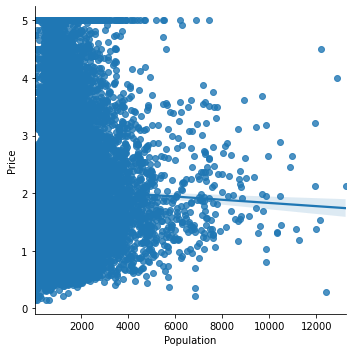

In [0]:
sns.lmplot(x=dataset.columns[4], y=dataset.columns[-1], data= dataset.query("Population<15000"))

f. Faites de même avec _AveOccup_. Cette fois filtrez la colonne pour ne garder unqiuement les valeurs inférieures à 100

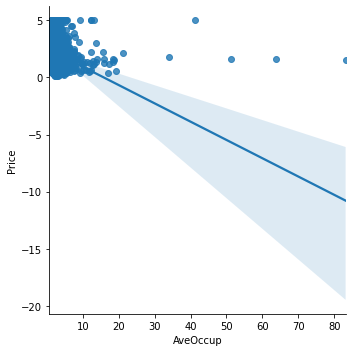

In [0]:
sns.lmplot(x=dataset.columns[5], y=dataset.columns[-1], data= dataset.query("AveOccup<100"))

6. Coupez votre dataset en deux. Vous aurez ```X``` comprenant les variables explicatives et  ```y``` contenant la variable cible

In [0]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [0]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

In [0]:
y

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [0]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


7. Maintenant, séparez votre dataset en un *train_set* et un *test_set*. On utilisera scikitlearn pour cela 

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [0]:
train_test_split?

In [0]:
len(y_train)

16512

In [0]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
6237,2.0670,31.0,4.413567,1.010941,1462.0,3.199125,34.06,-117.96
1949,2.5625,15.0,5.341463,1.045296,674.0,2.348432,38.75,-120.86
20508,1.2542,42.0,3.253571,1.135714,1372.0,2.450000,38.58,-121.51
8762,4.7026,34.0,4.530738,1.028689,1113.0,2.280738,33.81,-118.36
547,2.7115,52.0,3.741794,1.052516,849.0,1.857768,37.77,-122.27
...,...,...,...,...,...,...,...,...
11636,4.6250,25.0,5.952849,1.045187,1668.0,3.277014,33.83,-118.03
17940,3.6818,36.0,5.258333,0.997222,797.0,2.213889,37.33,-121.94
7825,4.3750,37.0,5.325714,0.977143,578.0,3.302857,33.91,-118.14
360,5.3700,26.0,6.127580,0.921201,1222.0,2.292683,37.76,-122.13


In [0]:
len(X_test)

4128

In [0]:
y_test

,Price
6956,1.726
4379,1.965
356,1.555
6530,1.659
15528,1.375
...,...
3775,2.750
11991,1.410
2231,1.119
18307,4.178


8. A votre avis, a-t-on besoin d'une phase de normalisation ? Si oui, faites là via scikitlearn

In [0]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15244,0.478380,0.187056,0.207265,-0.020255,-0.319472,-0.064349,-1.223209,1.142398
2781,-1.587857,-1.081328,-0.237806,0.318837,-0.415520,0.005936,-1.335517,2.453668
20462,1.043522,-0.605684,1.244097,-0.072868,-0.271449,0.031481,-0.624231,0.394526
11940,-0.753593,-0.526410,-0.509470,-0.062940,0.585993,-0.088404,-0.783335,1.067611
5694,0.558070,0.424879,0.434611,-0.039109,-0.028711,-0.016768,-0.638270,0.648803
...,...,...,...,...,...,...,...,...
5791,-0.657114,0.345605,-0.702688,-0.010399,0.555432,-0.041868,-0.689745,0.658774
10102,0.135200,0.504153,-0.024982,-0.325519,-0.380594,-0.023866,-0.788014,0.788405
14935,0.581071,-1.398425,0.371983,-0.171275,-0.029584,-0.019012,-1.391671,1.272030
4583,-1.342789,-0.288588,-1.466645,0.071677,2.006622,0.043034,-0.727181,0.638831


9. Créez votre modèle de régression linéaire via scikit learn

In [0]:
import statsmodels.api as sm

In [0]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [0]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3178.
Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
Time:                        09:11:26   Log-Likelihood:                -18122.
No. Observations:               16512   AIC:                         3.626e+04
Df Residuals:                   16503   BIC:                         3.633e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0757      0.006    367.750      0.000       2.065       2.087
MedInc         0.8332      0.009     93.532      0.000       0.816       0.851
HouseAge       0.1180      0.006     18.776      0.000       0.106       0.130
AveRooms      -0.2847      0.017    -16.789      0.000      -0.318      -0.251
AveBedrms      0.3246      0.016     20.722      0.000       0.294       0.355
Population    -0.0050      0.006     -0.824      0.410      -0.017       0.007
AveOccup      -0.0402      0.006     -7.096      0.000      -0.051      -0.029
Latitude      -0.9017      0.017    -52.561      0.000      -0.935      -0.868
Longitude     -0.8734      0.017    -51.808      0.000      -0.906      -0.840
==============================================================================
Omnibus:                     3460.615   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10991.157
Skew:                           1.068   Prob(JB):                         0.00
Kurtosis:                       6.378   Cond. No.                         6.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
regressor.fit?

10. Affichez votre score R2 via scikitlearn sur vos données de test. Commentez les résultats de votre score. 

In [0]:
regressor.score(X_train, y_train)

0.6064182853329589

In [0]:
regressor.score(X_test, y_test)

0.6047495052000387

11. Affichez les coefficients de chacune des variables explicatives 

In [0]:
regressor.coef_

array([[ 0.8331731 ,  0.11804474, -0.2847293 ,  0.32456023, -0.00495752,
        -0.04024311, -0.90167174, -0.87344272]])

12. Créez un DataFrame dans lequel vous aurez les colonnes qui se rapportent au bon coefficient

In [0]:
coefs = pd.DataFrame(index=dataset.columns[:-1], data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
MedInc,0.833173
HouseAge,0.118045
AveRooms,-0.284729
AveBedrms,0.324560
Population,-0.004958
AveOccup,-0.040243
Latitude,-0.901672
Longitude,-0.873443


13. ordonnez ce dataset par ordre décroissant. Que pouvez vous maintenant conclure ? 

In [0]:
coefs.sort_values(by="coefficients", ascending=False)

,coefficients
MedInc,0.833173
AveBedrms,0.324560
HouseAge,0.118045
Population,-0.004958
AveOccup,-0.040243
AveRooms,-0.284729
Longitude,-0.873443
Latitude,-0.901672


---> Les colonnes ayant le plus d'influence sont les MedInc, la Longitude & Latitude ainsi que le nombre de lit.  

14. En général, on évite de regarder les coefficients pour déterminer l'importance des features. On va plutôt utiliser la fonction ```f_regression``` de sklearn

Regardez la documentation de sckitlearn pour essayer de réussir à mettre en place cette metric

In [0]:
# Le F-Score indique quelle variable est la mieux indiquée d'un point de vue linéaire. Le F-Score est donc une indication sur l'importance des variables. 
# Plus le F-Score est élevé, plus la variable est pertinente. Et inversement. 

# La p-value mesure pour chaque variable la justesse des hypothèses du modèle
# Plus la p-value est faible, plus l'hypothèse est peu susceptible d'être erronée. Et inversement.  

from sklearn.feature_selection import f_regression

feature_importance = f_regression(X_train, y_train)


feature_importance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([1.47862189e+04, 1.74880533e+02, 3.45514990e+02, 3.43142134e+01,
        8.05282037e+00, 8.70009096e+00, 3.53129734e+02, 3.49620968e+01]),
 array([0.00000000e+00, 1.01225540e-39, 2.41331331e-76, 4.77858671e-09,
        4.54882523e-03, 3.18640473e-03, 5.73779127e-78, 3.42816014e-09]))

15. Mettez ensuite vos résultats dans un dataframe pour qu'on puisse les interpréter 

In [0]:
feature_ranking = pd.DataFrame(columns=dataset.columns[:-1], data=feature_importance, index=["f-score", "p-value"]).transpose().sort_values(["f-score", "p-value"], ascending=False)
feature_ranking

,f-score,p-value
MedInc,14786.218941,0.000000e+00
Latitude,353.129734,5.737791e-78
AveRooms,345.514990,2.413313e-76
HouseAge,174.880533,1.012255e-39
Longitude,34.962097,3.428160e-09
AveBedrms,34.314213,4.778587e-09
AveOccup,8.700091,3.186405e-03
Population,8.052820,4.548825e-03


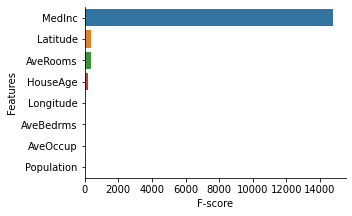

In [0]:
ax = sns.catplot(x=feature_ranking.columns[0], y=[index for index in feature_ranking.index], data=feature_ranking, kind="bar", legend=False)
ax.set(xlabel='F-score', ylabel='Features')
plt.show()

---> Ici, on voit que le classement des features est légèremetn différents. C'est sur ce f-score que l'on se fiera pour la suite des exercices. 

**Questions supplémentaires**

  
 

16. Prenez un échantillon de votre dataset via ```.sample()``` On prendra 150 valeurs

In [0]:
dataset = dataset.sample(150)
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
20263,2.9185,27.0,4.408879,1.137850,1339.0,3.128505,34.21,-119.19,2.245
1269,3.8125,15.0,4.590571,1.094293,1348.0,3.344913,37.95,-121.69,1.254
4452,2.1696,36.0,4.167500,1.150000,2881.0,3.601250,34.09,-118.16,1.708
4092,4.0208,17.0,4.694915,1.186441,119.0,2.016949,34.16,-118.42,3.417
4689,2.3375,40.0,4.129252,1.013605,777.0,1.761905,34.07,-118.36,3.552
...,...,...,...,...,...,...,...,...,...
16827,2.9087,27.0,4.258224,1.082237,1386.0,2.279605,37.63,-122.53,2.282
10947,2.2460,6.0,2.647788,1.056637,3800.0,3.362832,33.76,-117.87,1.833
2130,3.9338,17.0,5.602180,0.997275,1259.0,3.430518,36.80,-119.71,0.847
11939,3.1795,32.0,4.889831,1.008475,1509.0,2.557627,33.93,-117.42,1.256


17. Faites un reset des index pour avoir une suite de nombre comprise en 0 et la taille du dataset

In [0]:
dataset = dataset.reset_index(drop = True)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,2.9185,27.0,4.408879,1.137850,1339.0,3.128505,34.21,-119.19,2.245
1,3.8125,15.0,4.590571,1.094293,1348.0,3.344913,37.95,-121.69,1.254
2,2.1696,36.0,4.167500,1.150000,2881.0,3.601250,34.09,-118.16,1.708
3,4.0208,17.0,4.694915,1.186441,119.0,2.016949,34.16,-118.42,3.417
4,2.3375,40.0,4.129252,1.013605,777.0,1.761905,34.07,-118.36,3.552


  17. Utilisez l’aide suivante afin de traduire la longitude et la latitude des données pour trouver les villes correspondant à chaque observation : [geopy](https://pypi.org/project/geopy)

In [0]:
pip install geopy

In [0]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="yet_another_app")
location = geolocator.reverse("52.509669, 13.376294")
loc_dict = dict(location.raw)
loc_dict["address"]

{'borough': 'Mitte',
 'city': 'Berlin',
 'country': 'Deutschland',
 'country_code': 'de',
 'postcode': '10785',
 'quarter': 'Botschaftsviertel',
 'road': 'Bellevuestraße',
 'suburb': 'Tiergarten',
 'tourism': 'Potsdamer Platz'}

In [0]:
geolocator = Nominatim(user_agent="yet_another_app_2")
location = geolocator.reverse(str(dataset.loc[2, "Latitude"]) + "," + str(dataset.loc[2, "Longitude"]), timeout = None)
loc_dict = dict(location.raw)
print(dict(location.raw)["address"])

{'house_number': '3959', 'road': 'Stockbridge Avenue', 'neighbourhood': 'El Sereno', 'city': 'Alhambra', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '91801', 'country': 'United States of America', 'country_code': 'us'}


In [0]:
'''
lat = dataset["Latitude"].values.tolist()
lon = dataset["Longitude"].values.tolist()

coord = []

for i,j in zip(lat,lon):
  a = (i,j)
  coord.append(a)

In [0]:
'''
for i,j in zip(lat,lon):
  geolocator = Nominatim(user_agent="yet_another_app_2")
  location = geolocator.reverse("{}, {}".format(i, j), timeout = None)
  loc_dict = dict(location.raw)
  print(dict(location.raw)["address"])

In [0]:
from time import sleep
dataset["City"] = 0
for i in range(0, len(dataset)):
  geolocator = Nominatim(user_agent="yet_another_app_2")
  location = geolocator.reverse("{}, {}".format(dataset.loc[i, "Latitude"], dataset.loc[i, "Longitude"]), timeout = None)
  loc_dict = dict(location.raw)
  print(dict(location.raw)["address"])

  try:
    dataset.loc[i, "City"] = loc_dict["address"]["city"]
  except:
      try:
        dataset.loc[i, "City"] = loc_dict["address"]["town"]
      except:
        try:
           dataset.loc[i, "City"] = loc_dict["address"]["village"]
        except:
          pass

{'house_number': '1099', 'road': 'West Roderick Avenue', 'hamlet': 'El Rio', 'city': 'Oxnard', 'county': 'Ventura County', 'state': 'California', 'postcode': '93030', 'country': 'United States of America', 'country_code': 'us'}
{'road': 'Colerbrook Lane', 'hamlet': 'Arbor', 'city': 'Brentwood', 'county': 'Contra Costa County', 'state': 'California', 'postcode': '94513', 'country': 'United States of America', 'country_code': 'us'}
{'house_number': '3959', 'road': 'Stockbridge Avenue', 'neighbourhood': 'El Sereno', 'city': 'Alhambra', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '91801', 'country': 'United States of America', 'country_code': 'us'}
{'house_number': '13214', 'road': 'Morrison Street', 'neighbourhood': 'Garnsey', 'suburb': 'Valley Village', 'city': 'Los Angeles', 'county': 'Los Angeles County', 'state': 'California', 'postcode': '91423', 'country': 'United States of America', 'country_code': 'us'}
{'shop': 'Whole Foods Market', 'road': 'Fairfax Avenue'

 18. S'il y a des villes que vous n'avez pas trouvées, remplacez la valeur de la cellule par ```unknown```

In [0]:
dataset_sample = dataset

In [0]:
dataset_sample

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,City
0,2.9185,27.0,4.408879,1.137850,1339.0,3.128505,34.21,-119.19,2.245,Oxnard
1,3.8125,15.0,4.590571,1.094293,1348.0,3.344913,37.95,-121.69,1.254,Brentwood
2,2.1696,36.0,4.167500,1.150000,2881.0,3.601250,34.09,-118.16,1.708,Alhambra
3,4.0208,17.0,4.694915,1.186441,119.0,2.016949,34.16,-118.42,3.417,Los Angeles
4,2.3375,40.0,4.129252,1.013605,777.0,1.761905,34.07,-118.36,3.552,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
145,2.9087,27.0,4.258224,1.082237,1386.0,2.279605,37.63,-122.53,2.282,Pacifica
146,2.2460,6.0,2.647788,1.056637,3800.0,3.362832,33.76,-117.87,1.833,Santa Ana
147,3.9338,17.0,5.602180,0.997275,1259.0,3.430518,36.80,-119.71,0.847,Clovis
148,3.1795,32.0,4.889831,1.008475,1509.0,2.557627,33.93,-117.42,1.256,Riverside


In [0]:
dataset_sample.City[dataset_sample.City == 0]= "Unknown"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
dataset_sample

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,City
0,2.9185,27.0,4.408879,1.137850,1339.0,3.128505,34.21,-119.19,2.245,Oxnard
1,3.8125,15.0,4.590571,1.094293,1348.0,3.344913,37.95,-121.69,1.254,Brentwood
2,2.1696,36.0,4.167500,1.150000,2881.0,3.601250,34.09,-118.16,1.708,Alhambra
3,4.0208,17.0,4.694915,1.186441,119.0,2.016949,34.16,-118.42,3.417,Los Angeles
4,2.3375,40.0,4.129252,1.013605,777.0,1.761905,34.07,-118.36,3.552,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
145,2.9087,27.0,4.258224,1.082237,1386.0,2.279605,37.63,-122.53,2.282,Pacifica
146,2.2460,6.0,2.647788,1.056637,3800.0,3.362832,33.76,-117.87,1.833,Santa Ana
147,3.9338,17.0,5.602180,0.997275,1259.0,3.430518,36.80,-119.71,0.847,Clovis
148,3.1795,32.0,4.889831,1.008475,1509.0,2.557627,33.93,-117.42,1.256,Riverside


19. Trouvez le top 10 des villes qui ont les prix moyens les plus chers

In [0]:
dataset_sample

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,City
0,3.9250,12.0,6.089796,1.035374,2255.0,3.068027,34.52,-117.20,1.185,Apple Valley
1,5.0877,17.0,6.918699,0.959350,370.0,3.008130,38.33,-122.32,2.093,Napa
2,2.5735,20.0,4.742204,0.923077,1545.0,3.212058,34.05,-117.71,1.305,Montclair
3,2.9167,26.0,5.678715,1.064257,779.0,3.128514,36.34,-119.87,0.839,Unknown
4,5.0175,4.0,5.424051,1.026899,2158.0,3.414557,34.04,-117.50,1.434,Fontana
...,...,...,...,...,...,...,...,...,...,...
145,2.3750,41.0,2.146739,0.891304,549.0,2.983696,37.33,-121.88,1.750,San Jose
146,2.1205,36.0,4.833333,1.035256,1283.0,4.112179,36.45,-119.23,0.600,Unknown
147,4.1635,52.0,5.944297,1.175066,1042.0,2.763926,37.77,-122.47,3.984,San Francisco
148,2.6641,24.0,3.751419,1.114642,2085.0,2.366629,33.88,-118.14,1.682,Bellflower


20. Affichez ceci dans un graphique 

In [0]:
dataset_grp = dataset_sample.groupby("City").mean().sort_values(by="Price", ascending=False)[:10]
dataset_grp

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
City,,,,,,,,,
Saratoga,9.156900,22.000000,7.252669,0.925267,773.0,2.750890,37.280,-122.010,5.00001
Los Altos,9.814400,35.000000,7.024272,0.995146,619.0,3.004854,37.350,-122.070,5.00001
Hillsborough,11.683300,21.000000,8.497636,1.033097,2440.0,2.884161,37.560,-122.370,5.00001
Hermosa Beach,7.126400,34.000000,4.261905,1.035714,162.0,1.928571,33.860,-118.430,5.00001
Foster City,5.639600,19.000000,5.961136,1.050822,3437.0,2.568759,37.560,-122.250,4.30300
San Mateo,3.540333,37.333333,4.242703,1.061189,1603.0,1.967384,37.560,-122.320,4.23967
Glendale,5.336900,40.000000,5.709677,0.994624,998.0,2.682796,34.150,-118.230,3.70400
Cerritos,6.551300,16.000000,6.774684,0.989873,1377.0,3.486076,33.860,-118.050,3.50400
Santa Cruz,3.356600,41.500000,5.624145,1.167854,865.0,2.522839,36.945,-122.015,3.42100


In [0]:
dataset_grp = dataset_grp.reset_index(drop = False)
dataset_grp

,City,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,Saratoga,9.156900,22.000000,7.252669,0.925267,773.0,2.750890,37.280,-122.010,5.00001
1,Los Altos,9.814400,35.000000,7.024272,0.995146,619.0,3.004854,37.350,-122.070,5.00001
2,Hillsborough,11.683300,21.000000,8.497636,1.033097,2440.0,2.884161,37.560,-122.370,5.00001
3,Hermosa Beach,7.126400,34.000000,4.261905,1.035714,162.0,1.928571,33.860,-118.430,5.00001
4,Foster City,5.639600,19.000000,5.961136,1.050822,3437.0,2.568759,37.560,-122.250,4.30300
5,San Mateo,3.540333,37.333333,4.242703,1.061189,1603.0,1.967384,37.560,-122.320,4.23967
6,Glendale,5.336900,40.000000,5.709677,0.994624,998.0,2.682796,34.150,-118.230,3.70400
7,Cerritos,6.551300,16.000000,6.774684,0.989873,1377.0,3.486076,33.860,-118.050,3.50400
8,Santa Cruz,3.356600,41.500000,5.624145,1.167854,865.0,2.522839,36.945,-122.015,3.42100
9,Lakewood,4.575000,45.000000,5.578947,1.055556,890.0,2.602339,33.840,-118.140,3.36000


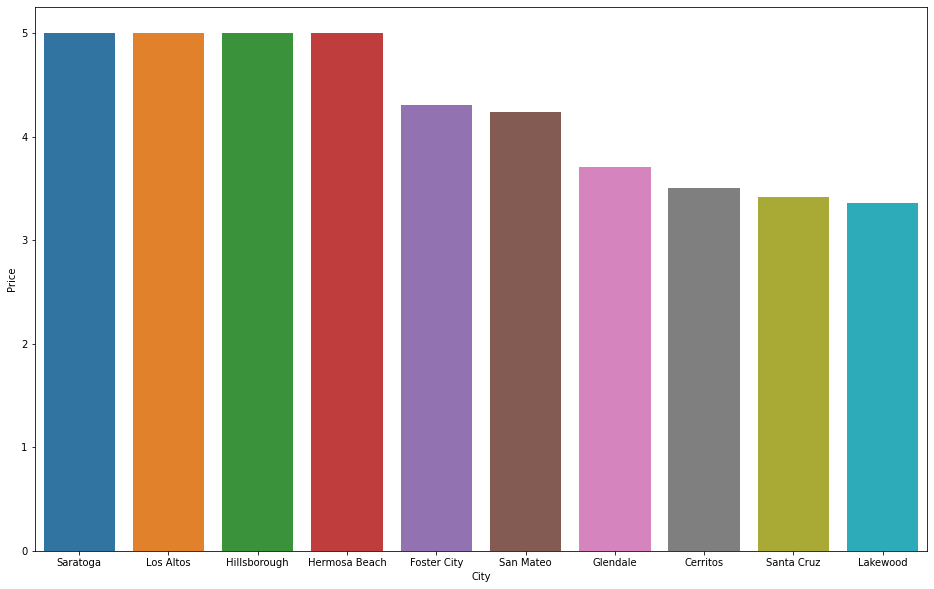

In [0]:
plt.figure(figsize=(16, 10))
sns.barplot(x=dataset_grp.iloc[:,0], y=dataset_grp.iloc[:,-1])

21. Refaites un modèle de régression linéaire en incluant les villes comme variables explicative. Quel score trouvez vous ?

In [0]:
# Dummyfication des villes 
dataset_sample= pd.get_dummies(dataset_sample, drop_first=True) 

In [0]:
dataset_sample

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,City_Alhambra,City_Anaheim,City_Arroyo Grande,City_Azusa,City_Bakersfield,City_Beaumont,City_Benicia,City_Berkeley,City_Brentwood,City_Burney,City_Cathedral City,City_Cerritos,City_Chula Vista,City_Clovis,City_Compton,City_Corona,City_Costa Mesa,City_Covelo,City_Daly City,City_El Cajon,City_El Monte,City_Escondido,City_Fairfield,City_Fallbrook,City_Fort Bragg,City_Foster City,City_Fresno,City_Garden Grove,City_Gerber,City_Glendale,City_Hayward,...,City_La Quinta,City_Lake Forest,City_Lakewood,City_Los Altos,City_Los Angeles,City_McKinleyville,City_Montebello,City_National City,City_Norwalk,City_Oakland,City_Oceanside,City_Ontario,City_Oxnard,City_Pacifica,City_Pasadena,City_Pico Rivera,City_Rancho Mirage,City_Riverside,City_San Diego,City_San Francisco,City_San Jose,City_San Juan Capistrano,City_San Leandro,City_San Mateo,City_Santa Ana,City_Santa Barbara,City_Santa Clarita,City_Santa Cruz,City_Santa Maria,City_Saratoga,City_Seaside,City_Simi Valley,City_Sunnyvale,City_Torrance,City_Trinity Village,City_Unknown,City_Vallejo,City_Ventura,City_Victorville,City_Walnut Creek
0,2.9185,27.0,4.408879,1.137850,1339.0,3.128505,34.21,-119.19,2.245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.8125,15.0,4.590571,1.094293,1348.0,3.344913,37.95,-121.69,1.254,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.1696,36.0,4.167500,1.150000,2881.0,3.601250,34.09,-118.16,1.708,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0208,17.0,4.694915,1.186441,119.0,2.016949,34.16,-118.42,3.417,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.3375,40.0,4.129252,1.013605,777.0,1.761905,34.07,-118.36,3.552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2.9087,27.0,4.258224,1.082237,1386.0,2.279605,37.63,-122.53,2.282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
146,2.2460,6.0,2.647788,1.056637,3800.0,3.362832,33.76,-117.87,1.833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
147,3.9338,17.0,5.602180,0.997275,1259.0,3.430518,36.80,-119.71,0.847,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
148,3.1795,32.0,4.889831,1.008475,1509.0,2.557627,33.93,-117.42,1.256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Séparation des variables 
X = dataset_sample.loc[:, dataset_sample.columns != "Price"]
y = dataset_sample.loc[:, dataset_sample.columns == "Price"]

In [0]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15)

In [0]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,City_Alhambra,City_Anaheim,City_Arroyo Grande,City_Azusa,City_Bakersfield,City_Beaumont,City_Benicia,City_Berkeley,City_Brentwood,City_Burney,City_Cathedral City,City_Cerritos,City_Chula Vista,City_Clovis,City_Compton,City_Corona,City_Costa Mesa,City_Covelo,City_Daly City,City_El Cajon,City_El Monte,City_Escondido,City_Fairfield,City_Fallbrook,City_Fort Bragg,City_Foster City,City_Fresno,City_Garden Grove,City_Gerber,City_Glendale,City_Hayward,City_Hermosa Beach,...,City_La Quinta,City_Lake Forest,City_Lakewood,City_Los Altos,City_Los Angeles,City_McKinleyville,City_Montebello,City_National City,City_Norwalk,City_Oakland,City_Oceanside,City_Ontario,City_Oxnard,City_Pacifica,City_Pasadena,City_Pico Rivera,City_Rancho Mirage,City_Riverside,City_San Diego,City_San Francisco,City_San Jose,City_San Juan Capistrano,City_San Leandro,City_San Mateo,City_Santa Ana,City_Santa Barbara,City_Santa Clarita,City_Santa Cruz,City_Santa Maria,City_Saratoga,City_Seaside,City_Simi Valley,City_Sunnyvale,City_Torrance,City_Trinity Village,City_Unknown,City_Vallejo,City_Ventura,City_Victorville,City_Walnut Creek
69,3.6583,44.0,5.534328,1.095522,976.0,2.913433,33.94,-118.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
126,3.3603,14.0,6.552124,1.173745,2866.0,2.766409,35.07,-120.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19,2.2439,18.0,7.426829,1.692073,955.0,1.455793,33.77,-116.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89,2.3148,37.0,5.133588,1.047710,1219.0,2.326336,32.75,-117.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143,3.8056,21.0,5.881517,1.175355,746.0,3.535545,34.47,-120.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,5.2323,22.0,6.704420,1.077348,1099.0,3.035912,33.13,-117.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41,4.8839,16.0,5.802486,1.085635,1667.0,2.302486,35.34,-119.07,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119,4.0938,37.0,5.979592,1.046382,1325.0,2.458256,38.13,-122.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
60,5.4876,35.0,6.163265,0.994169,1077.0,3.139942,33.80,-117.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Normalisation des données
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [0]:
# Application du modèle 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Evaluation du modèle 
regressor.score(X_test, y_test)

-3.394449945257988e+24

22. Notre modèle est globalement moins bon. A votre avis pourquoi ? 

----> Nous avons beaucoup moins de données. Il faudrait qu'on prenne un sample plus grand pour que notre modèle aient de quoi s'entraîner correctement. 